In [1]:
import librosa
import numpy as np

def extract_mfcc(file_path, n_mfcc=40):
    try:
        audio, sr = librosa.load(file_path, duration=3, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None

In [2]:
def extract_features(file_path):
    signal, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

In [7]:
import os
from glob import glob
# emotion_recognition_project/utils/label_features.py

def extract_emotion(filename):
    emotion_code = int(filename.split("-")[2])
    emotions = {
        1: "neutral",
        2: "calm",
        3: "happy",
        4: "sad",
        5: "angry",
        6: "fearful",
        7: "disgust",
        8: "surprised"
    }
    return emotions.get(emotion_code, "unknown")


def extract_filenames():
    # Ruta a la carpeta donde están los audios
    DATASET_PATH = "C:/Users/Janus/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_project/emotion_recognizer/audios"
    audio_files = glob(os.path.join(DATASET_PATH, "**/*.wav"), recursive=True)

# Crear una lista con tuplas: (ruta_archivo, emoción)
    data = []

    for file_path in audio_files:
        filename = os.path.basename(file_path)
        emotion = extract_emotion(filename)
        data.append((file_path, emotion))
    print(f"Total de archivos encontrados: {len(data)}")
    return data

In [8]:
import pandas as pd
data = extract_filenames()
df = pd.DataFrame(data, columns=["file_path", "emotion"])


Total de archivos encontrados: 2452


In [9]:
df['file_path'] = df['file_path'].apply(os.path.basename)
df

,file_path,emotion
0,03-01-01-01-01-01-01.wav,neutral
1,03-01-01-01-01-02-01.wav,neutral
2,03-01-01-01-02-01-01.wav,neutral
3,03-01-01-01-02-02-01.wav,neutral
4,03-01-02-01-01-01-01.wav,calm
...,...,...
2447,03-02-06-01-02-02-24.wav,fearful
2448,03-02-06-02-01-01-24.wav,fearful
2449,03-02-06-02-01-02-24.wav,fearful
2450,03-02-06-02-02-01-24.wav,fearful


In [ ]:
X = []
y = []

for file_path, emotion in data:
    features = extract_features(file_path)
    X.append(features)
    y.append(emotion)


In [11]:
import collections
print(collections.Counter(y))

Counter({'calm': 376, 'happy': 376, 'sad': 376, 'angry': 376, 'fearful': 376, 'disgust': 192, 'surprised': 192, 'neutral': 188})


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
print("Entrenando modelo...")
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluar
print("Evaluando...")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Entrenando modelo...
Evaluando...
              precision    recall  f1-score   support

       angry       0.79      0.75      0.77        79
        calm       0.59      0.74      0.66        80
     disgust       0.45      0.40      0.42        35
     fearful       0.53      0.58      0.55        66
       happy       0.66      0.61      0.63        76
     neutral       0.65      0.37      0.47        35
         sad       0.53      0.58      0.55        78
   surprised       0.53      0.48      0.50        42

    accuracy                           0.60       491
   macro avg       0.59      0.56      0.57       491
weighted avg       0.60      0.60      0.60       491



In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Normaliza los datos (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea y entrena el MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evalúa el modelo
y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Found array with dim 4. StandardScaler expected <= 2.

In [41]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 22050  # Frecuencia de muestreo (igual que en tu modelo)
seconds = 3  # Duración de la grabación

print("¡Habla ahora!")
audio = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Espera a que termine la grabación

write('mi_audio.wav', fs, audio)
print("Audio guardado como mi_audio.wav")

¡Habla ahora!
Audio guardado como mi_audio.wav


In [28]:
ruta_nuevo_audio = "C:/Users/Usuario/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_recognition_project/testing_code/mi_audio.wav"
nuevas_caracteristicas = extract_features(ruta_nuevo_audio)


prediccion = mlp.predict([nuevas_caracteristicas])
print("Emoción predicha:", prediccion[0])

C:\Users\Janus\AppData\Local\Temp\ipykernel_7396\2480845142.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=22050)
c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Usuario/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_recognition_project/testing_code/mi_audio.wav'

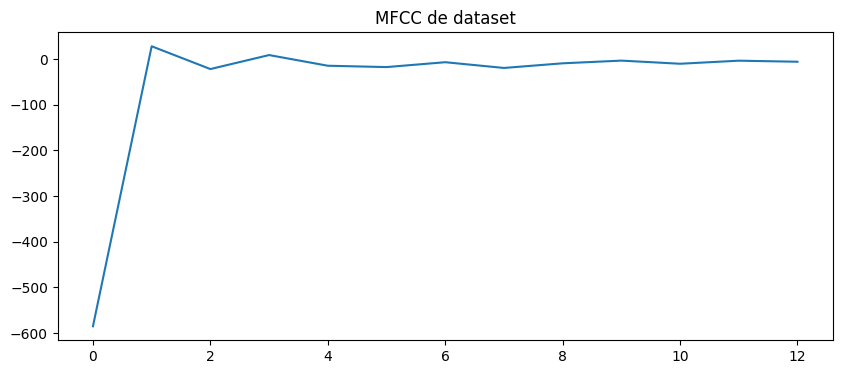

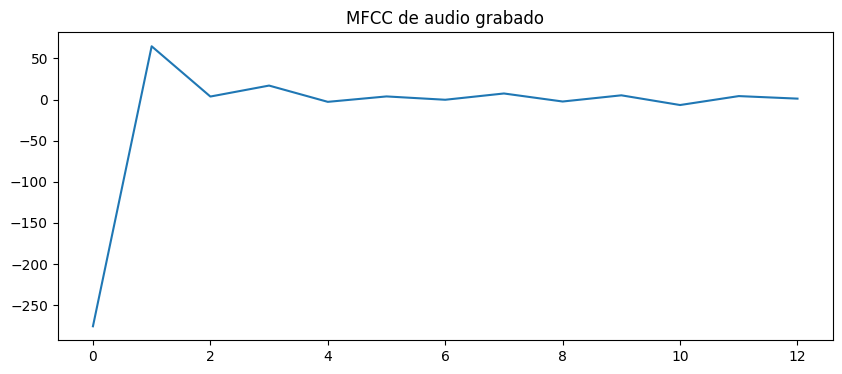

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.title("MFCC de dataset")
plt.plot(X_train[0])
plt.show()

plt.figure(figsize=(10,4))
plt.title("MFCC de audio grabado")
plt.plot(nuevas_caracteristicas)
plt.show()

In [ ]:
def extract_mfcc_2d(file_path, n_mfcc=40, max_len=130):
    try:
        audio, sr = librosa.load(file_path, duration=3, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        # Pad or truncate to fixed length
        if mfccs.shape[1] < max_len:
            pad_width = max_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, ((0,0),(0,pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_len]
        return mfccs
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None
    

X = []
y = []

for file_path, emotion in data:
    features = extract_mfcc_2d(file_path)
    if features is not None:
        X.append(features)
        y.append(emotion)

X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_test = X_test[..., np.newaxis]

import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(np.unique(y_encoded))

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Final\emotion_project\emotion_recognizer\testing_code\emotion_recognition_classifier.ipynb
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/100


c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.2222 - loss: 3.3216 - val_accuracy: 0.2010 - val_loss: 1.9780
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.3082 - loss: 1.6841 - val_accuracy: 0.3969 - val_loss: 1.6051
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.4573 - loss: 1.3791 - val_accuracy: 0.3969 - val_loss: 1.5001
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.5016 - loss: 1.2065 - val_accuracy: 0.4504 - val_loss: 1.4619
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.5771 - loss: 1.0629 - val_accuracy: 0.5344 - val_loss: 1.2326
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6453 - loss: 0.8974 - val_accuracy: 0.5344 - val_loss: 1.2327
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.7062 - loss: 0.7783 - val_accuracy: 0.5954 - val_loss: 1.0849
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.7695 - loss: 0.6392 - val_accuracy: 0.60

In [42]:
from tensorflow.keras.models import load_model
import numpy as np

# Cargar el modelo
modelo_cnn = load_model("modelo_emociones_cnn.h5")

# Preprocesar el nuevo audio (usa la misma función extract_mfcc_2d)
ruta_nuevo_audio = "C:/Users/Janus/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_project/emotion_recognizer/testing_code/angry.wav"
nuevas_caracteristicas = extract_mfcc_2d(ruta_nuevo_audio)

# Asegúrate de que tenga la misma forma que los datos de entrenamiento
if nuevas_caracteristicas is not None:
    nuevas_caracteristicas = np.expand_dims(nuevas_caracteristicas, axis=(0, -1))  # (1, n_mfcc, max_len, 1)
    prediccion = modelo_cnn.predict(nuevas_caracteristicas)
    emocion_predicha = le.inverse_transform([np.argmax(prediccion)])
    print("Emoción predicha:", emocion_predicha[0])
else:
    print("No se pudieron extraer características del audio.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Emoción predicha: calm


In [22]:
# Guardar el modelo entrenado
model.save("modelo_emociones_cnn.h5")
print("Modelo guardado como modelo_emociones_cnn.h5")

Modelo guardado como modelo_emociones_cnn.h5
